<a href="https://colab.research.google.com/github/luisDur8/Analisis-Avanzado-Python/blob/main/R4_Py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisis-Avanzado-Python
Pronóstico de valores para el año siguiente, se consideran datros de 4 años. Se usa la fórmula de suavizamiento exponencial.


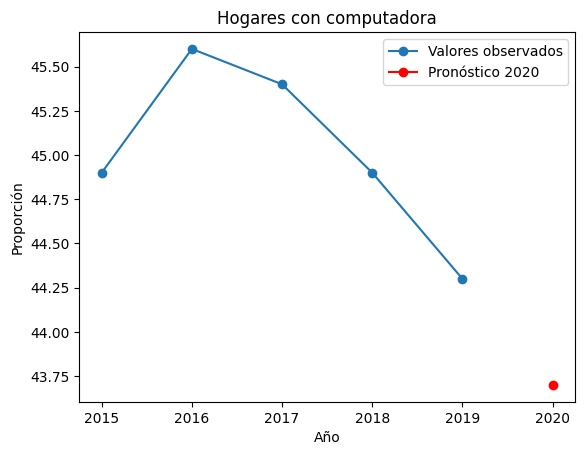

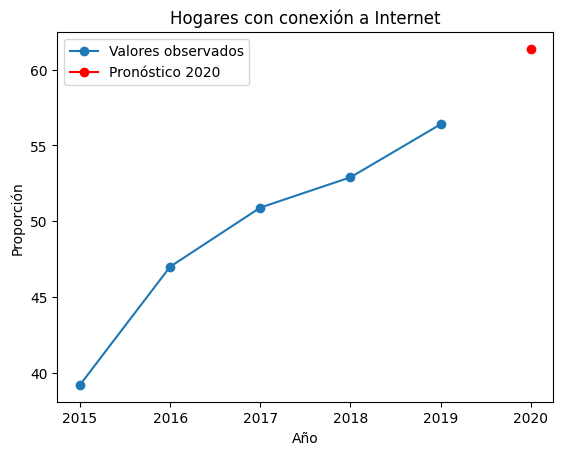

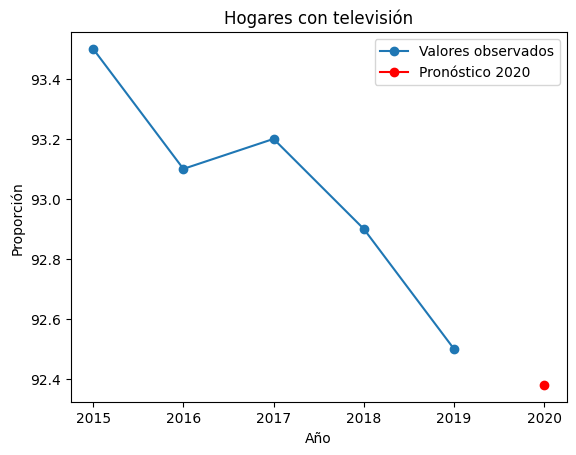

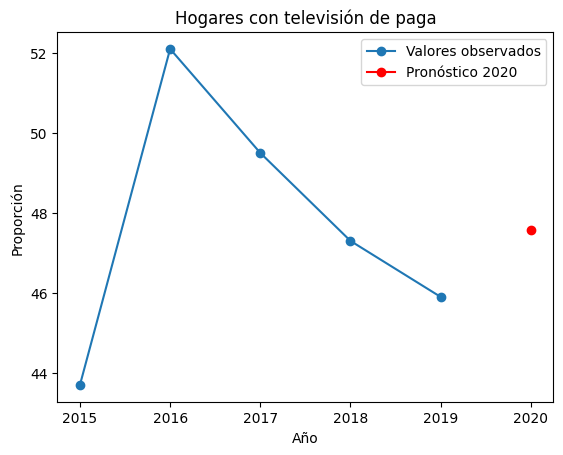

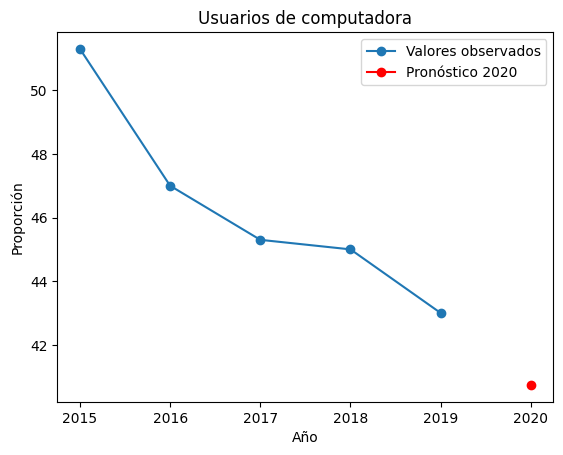

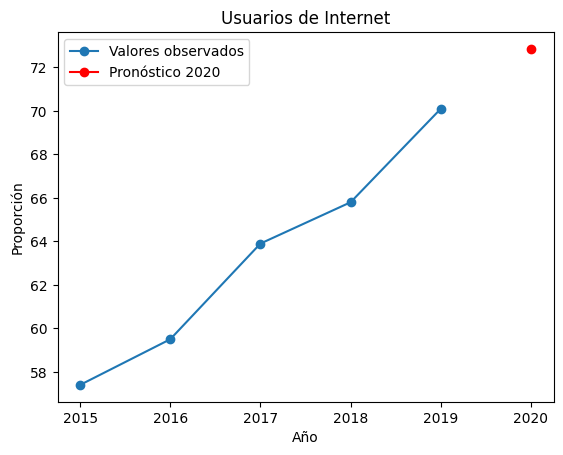

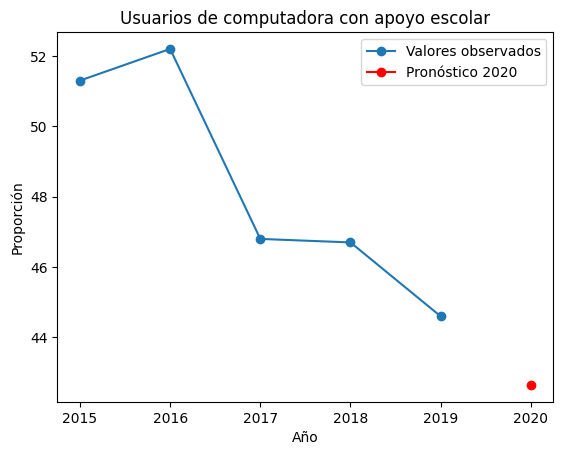

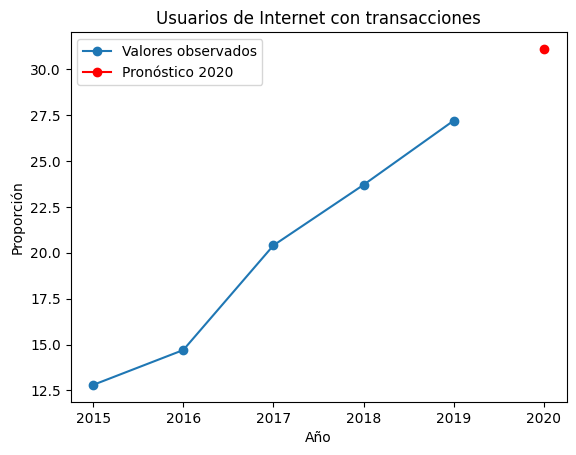

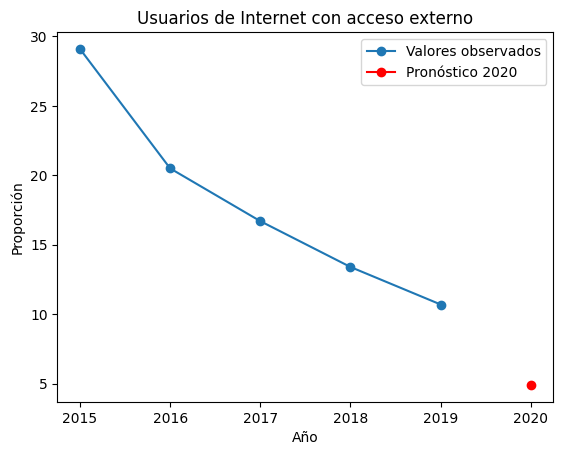

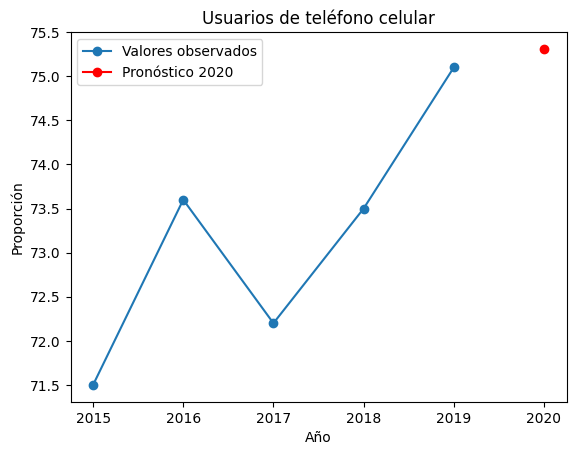

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Creación del dataframe con los datos
data = {
    'Clave Indicador': ['HC', 'HI', 'HT', 'HTP', 'U6E', 'UI6E', 'UCHE', 'UITI', 'UIFH', 'UTC6E'],
    'Descripción del indicador': ['Hogares con computadora', 'Hogares con conexión a Internet', 'Hogares con televisión', 'Hogares con televisión de paga',
                                  'Usuarios de computadora', 'Usuarios de Internet', 'Usuarios de computadora con apoyo escolar', 'Usuarios de Internet con transacciones',
                                  'Usuarios de Internet con acceso externo', 'Usuarios de teléfono celular'],
    '2015': [44.9, 39.2, 93.5, 43.7, 51.3, 57.4, 51.3, 12.8, 29.1, 71.5],
    '2016': [45.6, 47, 93.1, 52.1, 47, 59.5, 52.2, 14.7, 20.5, 73.6],
    '2017': [45.4, 50.9, 93.2, 49.5, 45.3, 63.9, 46.8, 20.4, 16.7, 72.2],
    '2018': [44.9, 52.9, 92.9, 47.3, 45, 65.8, 46.7, 23.7, 13.4, 73.5],
    '2019': [44.3, 56.4, 92.5, 45.9, 43, 70.1, 44.6, 27.2, 10.7, 75.1]
}

df = pd.DataFrame(data)

# Pronóstico y gráficas para cada indicador
for i in range(len(df)):
    indicador = df.loc[i, 'Descripción del indicador']
    valores = df.loc[i, '2015':'2019'].values

    # Aplicación de suavizamiento exponencial
    model = ExponentialSmoothing(valores, trend='add', seasonal=None)
    model_fit = model.fit()

    # Pronóstico de valores para el año 2020
    forecast = model_fit.forecast(steps=1)

    # Creación de gráfica de líneas de crecimiento
    plt.figure()
    plt.plot(range(2015, 2020), valores, marker='o', label='Valores observados')
    plt.plot(2020, forecast, marker='o', color='red', label='Pronóstico 2020')
    plt.xlabel('Año')
    plt.ylabel('Proporción')
    plt.title(indicador)
    plt.legend()
    plt.savefig(f'grafica_{i+1}.png')  # Guarda la gráfica en un archivo PNG
    plt.show()

# Archivo guardado en Drive y en Github (https://github.com/luisDur8/Analisis-Avanzado-Python)
